In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label = np.load('data-ques-2/label.npy')
score = np.load('data-ques-2/score.npy')

In [3]:
#label = np.array([[1,0,0],[0,0,1],[0,1,0],[1,0,0]])
#score = np.array([[.75,.5,0.1],[0.1,0.8,0.6],[0.7,0.5,0.2],[0.2,0.3,0.9]])

In [4]:
labelIndices =np.apply_along_axis(lambda val:np.where(val==1)[0][0],1,label)
rankIndices = np.apply_along_axis(lambda val:np.argsort(val)[::-1],1,score)   

In [5]:
rnkUpto = 10
cmc = np.zeros(rnkUpto)
for r in range(0,rnkUpto):
    for q in range(len(score)):
        if rankIndices[q][r] ==  labelIndices[q]:
            cmc[r]+=1
cmcTot = np.sum(cmc)

for r in range(1,rnkUpto):
    cmc[r]+=cmc[r-1]
for r in range(0,rnkUpto):
    cmc[r]/=cmcTot;

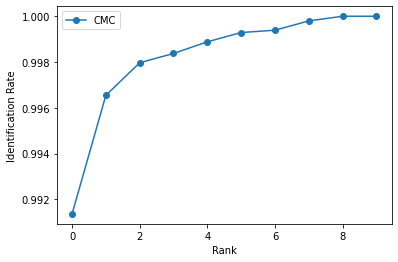

In [6]:

plt.plot(cmc, label="CMC" ,marker='o')
plt.ylabel("Identification Rate")
plt.xlabel("Rank")
plt.legend()
plt.show()
